In [0]:
import tensorflow as tf 

import numpy as np 
import matplotlib.pyplot as plt 
from IPython import display

plt.style.use('ggplot')
np.random.seed(0)

## Enter the data into numpy arrays


In [0]:
hours= np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,
                 2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])
failpass=np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])

## Plot of the raw data

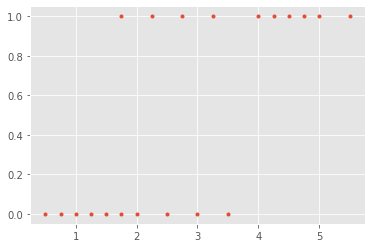

In [3]:
plt.plot(hours,failpass,'.')
plt.show()

### Create the variables we're going to train


In [0]:
b0 = tf.Variable(0.0)
b1 = tf.Variable(0.0)

## Create the logistic regression model and a cross entropy loss tensor


In [0]:
def Y_pred(X):
  return tf.sigmoid(tf.add(tf.multiply(X, b1), b0))

optimizer = tf.keras.optimizers.Adam(lr=0.1)

def loss(Y, Y_pred):
  return -tf.reduce_sum(Y*tf.math.log(Y_pred))-tf.reduce_sum((1.0-Y)*tf.math.log(1.0-Y_pred))

### Set up Tensorflow training loop

In [0]:
def train(x, y):
    with tf.GradientTape() as tape:
        predicted = Y_pred(x)   
        current_loss = loss(y, predicted)
        gradients = tape.gradient(current_loss, [b1, b0])
        optimizer.apply_gradients(zip(gradients, [b1 ,b0]))
    return b1, b0, predicted, current_loss

### Use the training loop to train on the dataset

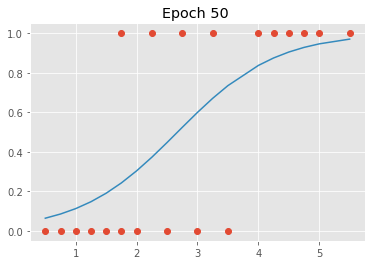

In [7]:
epochs = range(50)
for epoch in epochs:

  slope, intercept, pred, training_loss = train(hours, failpass)

  plt.clf()    
  plt.plot(hours,failpass, 'o', label ='Original data') 
  plt.plot(hours, pred, label ='Fitted line') 
  plt.title('Epoch {} '.format((epoch + 1)))
  display.display(plt.gcf())
  display.clear_output(wait=True) 

## Now we'll run the proper training for 500 epochs


In [0]:
epochs = range(500)
for epoch in epochs:

  slope, intercept, pred, training_loss = train(hours, failpass)

## Plot of our final estimates of the parameters

slope = <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.504645> intercept = <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-4.0777125>


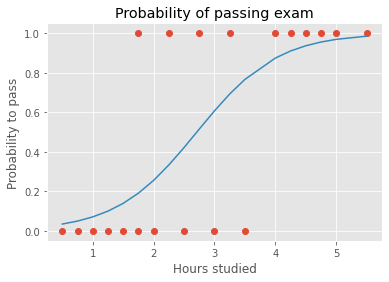

In [9]:
print("slope =", slope, "intercept =", intercept) 

plt.plot(hours,failpass, 'o', label ='Original data') 
plt.plot(hours, pred, label ='Fitted line') 

plt.title('Probability of passing exam')
plt.xlabel('Hours studied')
plt.ylabel('Probability to pass')
plt.show()